# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

In [17]:
# Imports

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [18]:
#stock image download

url ="https://picsum.photos/seed/picsum/1080/1080"
!wget $url

--2025-12-12 09:26:39--  https://picsum.photos/seed/picsum/1080/1080
Resolving picsum.photos (picsum.photos)... 104.26.4.30, 172.67.74.163, 104.26.5.30, ...
Connecting to picsum.photos (picsum.photos)|104.26.4.30|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://fastly.picsum.photos/id/866/1080/1080.jpg?hmac=-odINC3zxT6LEkwBCvtQu3ZGiihMHEJal0Lh4RjkvGU [following]
--2025-12-12 09:26:39--  https://fastly.picsum.photos/id/866/1080/1080.jpg?hmac=-odINC3zxT6LEkwBCvtQu3ZGiihMHEJal0Lh4RjkvGU
Resolving fastly.picsum.photos (fastly.picsum.photos)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to fastly.picsum.photos (fastly.picsum.photos)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56116 (55K) [image/jpeg]
Saving to: ‘1080.1’

1080.1              100%[===================>]  54.80K  --.-KB/s    in 0.01s   

2025-12-12 09:26:39 (4.20 MB/s) - ‘1080.1’ saved [56116/56116]



(np.float64(-0.5), np.float64(1079.5), np.float64(1079.5), np.float64(-0.5))

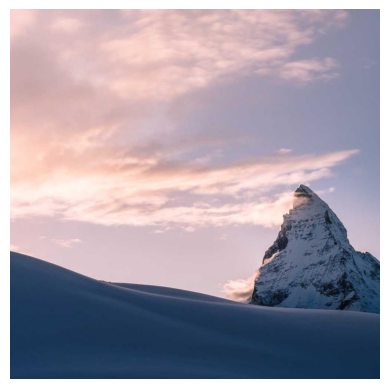

In [19]:
img = np.array(Image.open("1080"))
plt.imshow(img)
plt.axis("off")


(np.float64(-0.5), np.float64(1079.5), np.float64(1079.5), np.float64(-0.5))

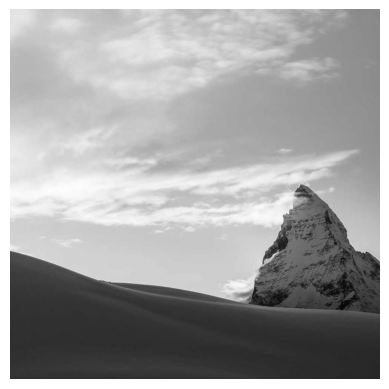

In [20]:
# RGB to Gray conversion

gray = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
plt.imshow(gray, cmap="gray")
plt.axis("off")

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [21]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

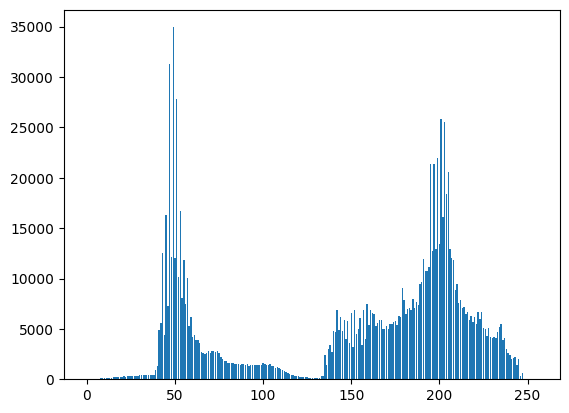

In [22]:
def gray_histogram(gray_img):
    hist = np.zeros(256, dtype=int)           # 1D array of size 256 to store no. of pixels
    for i in range(gray_img.shape[0]):
        for j in range(gray_img.shape[1]):
            hist[gray_img[i, j]] += 1
    return hist

hist = gray_histogram(gray.astype(np.uint8))

plt.bar(np.arange(256), hist)
plt.show()


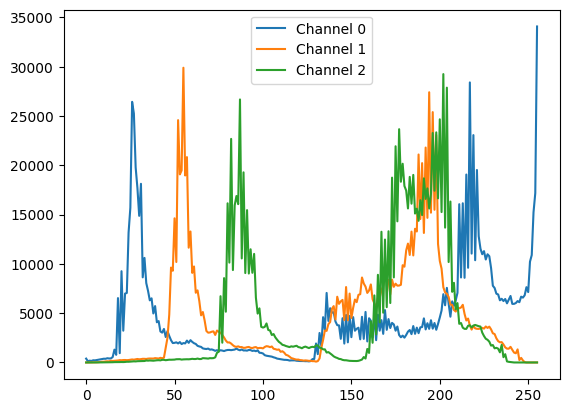

In [23]:
def rgb_histogram(rgb_img):
    hist = np.zeros((3, 256), dtype=int)
    H, W, C = rgb_img.shape                     # 1080, 1080, 3

    for k in range(C):
        for i in range(H):
            for j in range(W):
                value = rgb_img[i, j, k]
                hist[k, value] += 1

    return hist


hist = rgb_histogram(img.astype(np.uint8))
for k in range(3):
  plt.plot(np.arange(256), hist[k], label=f"Channel {k}")
plt.legend()
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [24]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [25]:
def rgb_to_hsv(rgb_img):

    # (H:0..179, S:0..255, V:0..255)

    rgb = rgb_img.astype(np.float32)
    r = rgb[..., 0]
    g = rgb[..., 1]
    b = rgb[..., 2]

    maxc = np.maximum(np.maximum(r, g), b)    #maxima at each pixel
    minc = np.minimum(np.minimum(r, g), b)    #minima
    diff = maxc - minc

    # V
    v = maxc      #easiest to calculate, equal to the maxima of the image

    # S
    s = np.zeros_like(maxc, dtype=np.float32)
    nz = maxc > 0
    s[nz] = (diff[nz] / maxc[nz]) * 255.0

    # H
    h = np.zeros_like(maxc, dtype=np.float32)
    mask = diff > 1e-6  # avoid grey pixels, to avoid div by zero

    # red is max
    idx = (maxc == r) & mask
    h[idx] = ( (g[idx] - b[idx]) / diff[idx] ) * 60.0

    # green is max
    idx = (maxc == g) & mask
    h[idx] = ( 2.0 + (b[idx] - r[idx]) / diff[idx] ) * 60.0

    # blue is max
    idx = (maxc == b) & mask
    h[idx] = ( 4.0 + (r[idx] - g[idx]) / diff[idx] ) * 60.0

    # wrap negative hues and scale to OpenCV H (0..179)
    h = np.mod(h, 360.0)
    h = h / 2.0  # OpenCV stores H in [0,179]

    # Stack, round, clip and convert to uint8
    hsv = np.stack([h, s, v], axis=-1)
    hsv = np.rint(hsv)                  #round-off
    hsv[..., 0] = np.clip(hsv[..., 0], 0, 179)
    hsv[..., 1] = np.clip(hsv[..., 1], 0, 255)
    hsv[..., 2] = np.clip(hsv[..., 2], 0, 255)
    return hsv.astype(np.uint8)

(np.float64(-0.5), np.float64(1079.5), np.float64(1079.5), np.float64(-0.5))

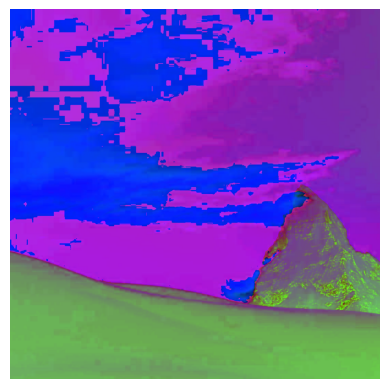

In [26]:
hsv_img = rgb_to_hsv(img)
plt.imshow(hsv_img)
plt.axis("off")

(np.float64(-0.5), np.float64(1079.5), np.float64(1079.5), np.float64(-0.5))

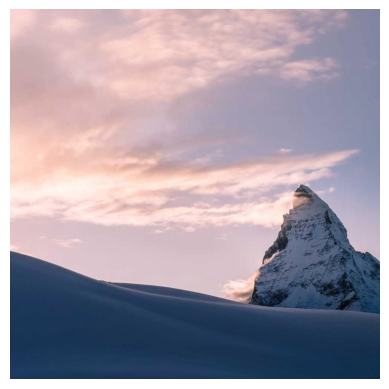

In [27]:
rgb_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
plt.imshow(rgb_img)
plt.axis("off")

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [28]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

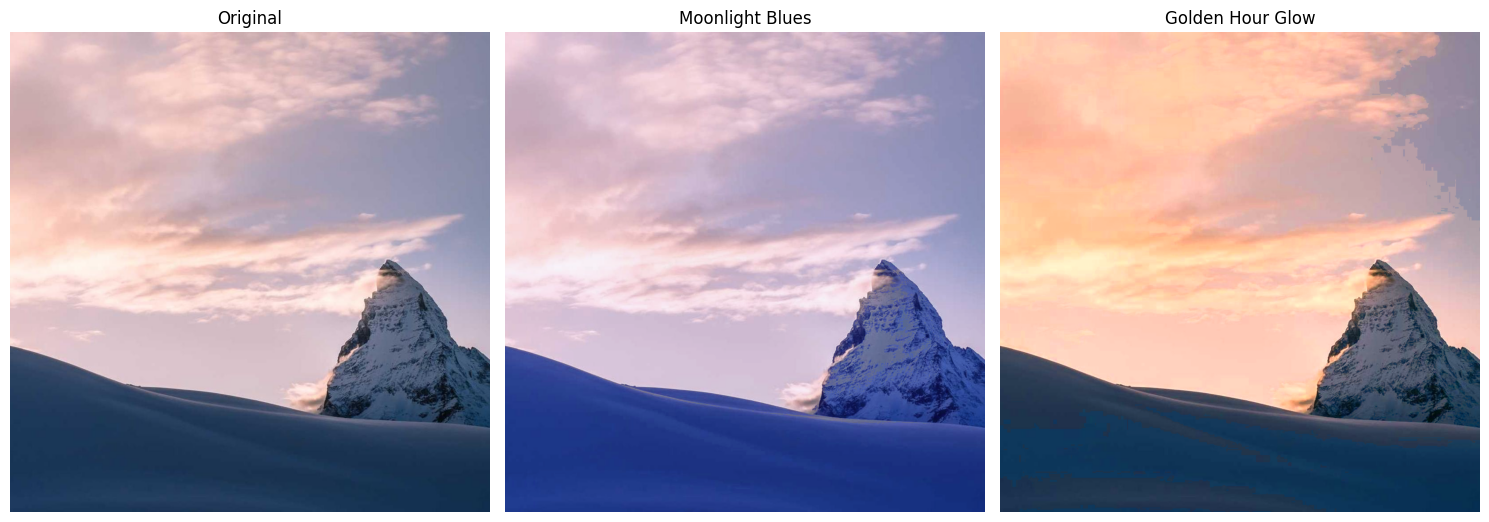

In [29]:
# For this, I just tried to replicate two of Photoshop's LUTs available which are daytonight and latesunset



def apply_gamma(img, gamma):
    # Apply gamma correction

    inv = 1.0 / gamma
    # build LUT (uint8)
    lut = np.array([((i / 255.0) ** inv) * 255.0 for i in range(256)], dtype=np.uint8)
    return cv2.LUT(img.astype(np.uint8), lut).astype(np.float32)

def change_contrast(img, factor, pivot=128.0):

    return (img - pivot) * factor + pivot

# Filter 1: "Moonlight Blues"
def moonlight_blues(img_rgb):
    """
    What is does:
      - Slightly reduce brightness (night)
      - Boost contrast a bit
      - Add a cool (blue) tint, stronger in shadows
      - Reduce overall saturation slightly (subtle desat for night mood)
      - Apply gentle gamma to darken midtones for a nocturnal look
      - Channel-mix shadows: push shadows toward blue/teal while leaving highlights

    Suitable for: city/night/sea scenes where cool tones and moody contrast help.
    """
    # convert to float
    out = img_rgb.astype(np.float32)

    # Contrast adjustment (slightly higher contrast)
    out = change_contrast(out, factor=1.12, pivot=128.0)

    # Brightness shift (make it a bit darker overall)
    out = out * 0.92

    # Blue tint: add to Blue channel globally
    out[..., 2] += 18.0

    # Channel mixing for shadows: push dark pixels more toward blue/teal
    #    Compute luminance and create shadow mask
    lum = (0.2126 * out[..., 0] + 0.7152 * out[..., 1] + 0.0722 * out[..., 2])
    shadow_mask = (lum < 90).astype(np.float32)[..., None]  # stronger effect in dark areas
    # In shadows: reduce red/green, boost blue
    out[..., 0] = out[..., 0] * (1.0 - 0.18 * shadow_mask[..., 0])    # reduce R in shadows
    out[..., 1] = out[..., 1] * (1.0 - 0.10 * shadow_mask[..., 0])    # slightly reduce G
    out[..., 2] = out[..., 2] + (36.0 * shadow_mask[..., 0])          # boost B in shadows

    # Slight desaturation: convert to HSV, lower S a bit
    hsv = rgb_to_hsv(out).astype(np.float32)
    hsv[..., 1] = hsv[..., 1] * 0.88   # reduce saturation by 12%
    hsv[..., 1] = np.clip(hsv[..., 1], 0, 255)
    out = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32)

    # Final gamma to darken midtones (gentle)
    out = apply_gamma(out, gamma=1.08).astype(np.float32)

    # clamp and return uint8
    out = np.clip(out, 0, 255).astype(np.uint8)
    return out

# Filter 2: "Golden Hour Glow"
def golden_hour_glow(img_rgb):
    """
    What it does:
      - Increase warm tint (boost red/orange)
      - Increase saturation for vibrance
      - Slight contrast boost and small highlight lift
      - Gentle split-toning: warm highlights, slightly teal shadows
      - Mild gamma for brighter midtones

    Suitable for: outdoor photos during sunset/beach/portraits to emulate warm golden-hour light.
    """
    out = img_rgb.astype(np.float32)

    # Slight contrast
    out = change_contrast(out, factor=1.07, pivot=118.0)  # pivot slightly lower to lift highlights

    # Warm tint: add to R and G channels, reduce B slightly
    out[..., 0] += 18.0   # R +18
    out[..., 1] += 8.0    # G +8
    out[..., 2] -= 6.0    # B -6 (warmth)

    # Vibrance / saturation boost: operate in HSV
    hsv = rgb_to_hsv(out).astype(np.float32)
    # Increase saturation but protect already highly saturated pixels: simple vibrance logic
    sat = hsv[..., 1] / 255.0
    boost = (1.0 - sat) * 0.32  # more boost where saturation is low
    hsv[..., 1] = hsv[..., 1] + (hsv[..., 1] * boost)
    hsv[..., 1] = np.clip(hsv[..., 1], 0, 255)

    # Split-toning effect: warm highlights, teal shadows
    # We'll map pixels by value to apply different color tints
    val = hsv[..., 2]
    highlights_mask = (val > 170).astype(np.float32)[..., None]
    shadows_mask = (val < 80).astype(np.float32)[..., None]

    # warm highlights: increase R more in highlights
    out = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32)
    out[..., 0] += 24.0 * highlights_mask[..., 0]   # boost red in highlights
    out[..., 1] += 12.0 * highlights_mask[..., 0]   # boost green in highlights

    # teal shadows: slightly decrease red, raise blue/green in shadows
    out[..., 0] -= 14.0 * shadows_mask[..., 0]     # reduce red in shadows
    out[..., 1] += 6.0 * shadows_mask[..., 0]      # raise green in shadows
    out[..., 2] += 18.0 * shadows_mask[..., 0]     # raise blue in shadows

    # Gentle gamma to brighten midtones
    out = apply_gamma(np.clip(out, 0, 255).astype(np.uint8), gamma=0.95).astype(np.float32)

    # clamp and return uint8
    out = np.clip(out, 0, 255).astype(np.uint8)
    return out



# Apply filters
blue_night = moonlight_blues(img)
gold_glow  = golden_hour_glow(img)

# Show side-by-side: original, moonlight, golden
plt.figure(figsize=(15,6))
plt.subplot(1,3,1); plt.title("Original"); plt.axis("off"); plt.imshow(img)
plt.subplot(1,3,2); plt.title("Moonlight Blues"); plt.axis("off"); plt.imshow(blue_night)
plt.subplot(1,3,3); plt.title("Golden Hour Glow"); plt.axis("off"); plt.imshow(gold_glow)
plt.tight_layout()
plt.show()


## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [30]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [31]:
def white_patch_balance(img_rgb):

    img = img_rgb.astype(np.float32)  # since int8 can't store decimals

    # find the brightest value in each channel
    max_r = np.max(img[..., 0])
    max_g = np.max(img[..., 1])
    max_b = np.max(img[..., 2])

    # scale factors to push each channel's brightest pixel to 255
    scale_r = 255.0 / max_r
    scale_g = 255.0 / max_g
    scale_b = 255.0 / max_b

    # apply scaling
    out = img.copy()
    out[..., 0] *= scale_r
    out[..., 1] *= scale_g
    out[..., 2] *= scale_b

    # clamp and convert back to uint8
    out = np.clip(out, 0, 255).astype(np.uint8)
    return out


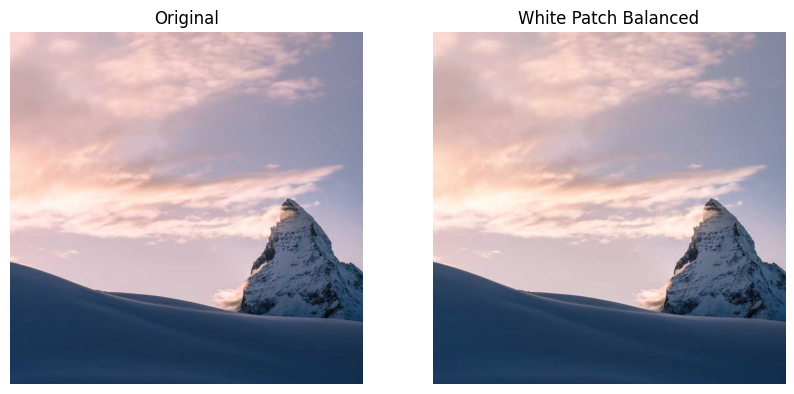

In [32]:
balanced = white_patch_balance(img)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.title("Original"); plt.axis("off"); plt.imshow(img)
plt.subplot(1,2,2); plt.title("White Patch Balanced"); plt.axis("off"); plt.imshow(balanced)
plt.show()


## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [33]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [34]:
def white_balance(img_rgb, value):
    if not (0.0 <= value <= 1.0):
        raise ValueError("value must be in [0,1]")

    img = img_rgb.astype(np.float32)
    t = (value - 0.5) * 2.0

    r_scale = 1.0 + 0.40 * t
    g_scale = 1.0 + 0.12 * t
    b_scale = 1.0 - 0.40 * t
    scales = np.array([r_scale, g_scale, b_scale], dtype=np.float32)
    out = img * scales[None, None, :]

    tint = 6.0 * t
    out[..., 1] += tint

    hsv = cv2.cvtColor(np.clip(out, 0, 255).astype(np.uint8), cv2.COLOR_RGB2HSV).astype(np.float32)
    sat_amt = 0.18 * t
    hsv[..., 1] = np.clip(hsv[..., 1] * (1.0 + sat_amt), 0, 255)
    out = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32)

    gamma = 1.0 - 0.06 * t
    if abs(gamma - 1.0) > 1e-6:
        inv = 1.0 / gamma
        lut = np.array([((i / 255.0) ** inv) * 255.0 for i in range(256)], dtype=np.float32)
        out = cv2.LUT(np.clip(out, 0, 255).astype(np.uint8), lut.astype(np.uint8)).astype(np.float32)
    else:
        out = np.clip(out, 0, 255)

    out = np.clip(out, 0, 255).astype(np.uint8)
    return out

(np.float64(-0.5), np.float64(1079.5), np.float64(1079.5), np.float64(-0.5))

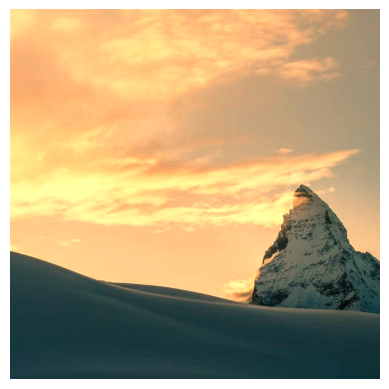

In [35]:
img_out = white_balance(img, 0.8)
plt.imshow(img_out)
plt.axis("off")